<h1><center>ANALISE DOS DADOS ELEITORAIS DF 2014/2018</center></h1>
<h2>Objetivo</h2>

O objetivo desse trabalho é realizar uma analise dos dados de votação retirados do site do TSE, para as eleições de 2014 e 2018. Fazendo um comparativo das votações da Candidata Leila do Volei.

Link de acesso:http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais
Arquivo: Votação nominal por município e zona (formato ZIP)
    
    Os dados são disponiblizados atráves do formato txt, foi criado um arquivo csv para a importação no jupyter.

    votacao_candidato_munzona_2014_DF.csv
    detalhe_votacao_munzona_2018_DF

<a name='TOPO'></a>
<h1>Índice</h1>
<ol>
<li><a href='#DATA2014'>Eleição de 2014</a></li>
<li><a href='#DATAANALYSIS2014'>Análise dos Dados 2014 (Data Analysis)</a></li>
<li><a href='#DATA2018'>Eleição de 2018</a></li>
<li><a href='#DATAANALYSIS2018'>Análise dos Dados 2018 (Data Analysis)</a></li>
<li><a href='#CONCLUSAO'>Conclusão</li>
</ol>

<a name='DATA2014'></a>
<h1>Eleição de 2014</h1>

In [78]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
# Criando o DataFrame

df = pd.read_csv('votacao_candidato_munzona_2014_DF.csv', sep=';', encoding='cp1252', usecols=[9, 14, 15, 21, 28])


df.head ()

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,DESC_SIT_CAND_TOT,TOTAL_VOTOS
0,1,TONINHO DO PSOL,GOVERNADOR,NÃO ELEITO,2092
1,1,ROLLEMBERG,GOVERNADOR,2º TURNO,33044
2,1,AGNELO QUEIROZ,GOVERNADOR,NÃO ELEITO,8720
3,1,REGUFFE,SENADOR,ELEITO,38603
4,1,PROFESSOR BATISTA,DEPUTADO FEDERAL,NÃO ELEITO,60


In [8]:
# Tipologia das colunas
df.dtypes

NUMERO_ZONA             int64
NOME_URNA_CANDIDATO    object
DESCRICAO_CARGO        object
DESC_SIT_CAND_TOT      object
TOTAL_VOTOS             int64
dtype: object

In [9]:
# Verificando a quantidade de registros do arquivo.
df.count()

NUMERO_ZONA            23583
NOME_URNA_CANDIDATO    23583
DESCRICAO_CARGO        23583
DESC_SIT_CAND_TOT      23583
TOTAL_VOTOS            23583
dtype: int64

In [10]:
# Existe algum valor nulo no arquivo?
df.isnull().sum()

NUMERO_ZONA            0
NOME_URNA_CANDIDATO    0
DESCRICAO_CARGO        0
DESC_SIT_CAND_TOT      0
TOTAL_VOTOS            0
dtype: int64

<a name="DATAANALYSIS2014"></a>
<a href='#TOPO'>Voltar ao índice</a>
<h1>Análise dos Dados 2014 (Data Analysis)</h1>

In [11]:
# Encontrado apenas os candidatos que foram eleitos.
df[df['DESC_SIT_CAND_TOT'] == 'ELEITO']

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,DESC_SIT_CAND_TOT,TOTAL_VOTOS
3,1,REGUFFE,SENADOR,ELEITO,38603
8,1,ROLLEMBERG,GOVERNADOR,ELEITO,40549
1122,2,ROLLEMBERG,GOVERNADOR,ELEITO,38696
1129,2,REGUFFE,SENADOR,ELEITO,39699
2248,3,ROLLEMBERG,GOVERNADOR,ELEITO,27101
2258,3,REGUFFE,SENADOR,ELEITO,28933
3368,4,REGUFFE,SENADOR,ELEITO,47247
3671,4,ROLLEMBERG,GOVERNADOR,ELEITO,41173
4494,5,ROLLEMBERG,GOVERNADOR,ELEITO,52411
4504,5,REGUFFE,SENADOR,ELEITO,50553


In [12]:
# Criando um novo DataFrame apenas com os candidatos a DEPUTADO DISTRITAL
df_2 = df[df.DESCRICAO_CARGO.str.contains("DEPUTADO DISTRITAL")]

df_2.head()

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,DESC_SIT_CAND_TOT,TOTAL_VOTOS
128,1,ADOLFO COSTA,DEPUTADO DISTRITAL,SUPLENTE,121
129,1,AMANDA MELO,DEPUTADO DISTRITAL,SUPLENTE,4
130,1,TENENTE GLAUCY,DEPUTADO DISTRITAL,SUPLENTE,0
131,1,JANE ALVES,DEPUTADO DISTRITAL,SUPLENTE,0
148,1,DELEGADO FERNANDO FERNANDES,DEPUTADO DISTRITAL,SUPLENTE,75


In [35]:
# Agrupando os votos por zonas eleitorais.
votos_candidato ={}
nome_candidato = df_2['NOME_URNA_CANDIDATO'].unique()

# Esses são alguns políticos contidos nesse arquivo
nome_candidato[0:10]

array(['ADOLFO COSTA', 'AMANDA MELO', 'TENENTE GLAUCY', 'JANE ALVES',
       'DELEGADO FERNANDO FERNANDES', 'CLAUDINHA NEVES', 'JABÁ',
       'OSWALDO VAZ', 'WILSON GREY', 'JADER FIALHO'], dtype=object)

Já que possuímos agora os nomes dos candidatos a deputado distrital presentes no arquivo, vamos realizar um laço - looping - para visualizarmos quantos votos cada um obteve na eleição de 2014. O loop for abaixo irá criar uma chave no dicionário votos_candidato - criado acima - e usará como valor desta chave a soma dos votos do respectivo político. Acompanhe:

In [40]:
for i in nome_candidato:
    i_nome = df_2[df_2['NOME_URNA_CANDIDATO'] == i] #Série criada somente onde o nome do candidato
    total_de_votos = i_nome['TOTAL_VOTOS '].sum() #Soma de todos votos por candidato
    votos_candidato[i] = total_de_votos #Criando chave e valor no dicionário, convertendo os totais para Real
    votos_por_candidato = pd.DataFrame.from_dict(votos_candidato, orient='index') #Criando DataFrame com base no dicionário
    votos_por_candidato.columns = ['TOTAL_VOTOS '] #Renomeando a coluna com valores

In [41]:
# Primeira linhas do DataFrame criado
votos_por_candidato.head()

,TOTAL_VOTOS
ADOLFO COSTA,963
AMANDA MELO,262
TENENTE GLAUCY,50
JANE ALVES,108
DELEGADO FERNANDO FERNANDES,12079


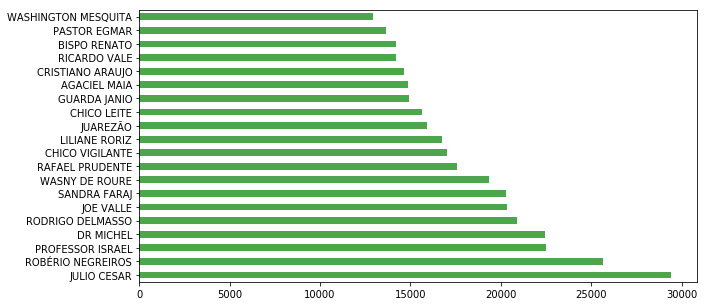

In [45]:
# Vamos plotar um gráfico com os candidatos que tiveram o maior número de votos
votos_por_candidato = votos_por_candidato.sort_values('TOTAL_VOTOS ', ascending=False) #Ordenando os valores
votos_por_candidato.head(20).plot(kind='barh', figsize=(10,5), color='green', legend=False, alpha=0.7)

In [33]:
# Criando uma tabela com a quantidade de votos de cada deputado em cada zona eleitoral
pd.pivot_table(df_2, index=["NOME_URNA_CANDIDATO"], columns=["NUMERO_ZONA"], aggfunc='sum', margins= True)

TOTAL_VOTOS                                      \
NUMERO_ZONA                           1      2      3      4      5      6   
NOME_URNA_CANDIDATO                                                          
ABENÇOADO EUDE                      499     15     11     44     15     19   
ACN GAMA                              1      1      7      5      7      8   
ADAGLION AIRES                       19     17      6      5     21      0   
ADELINO DOS BOIS O GAUCHO             4      1      2     33      2      7   
ADELMO GUERRA                         1      3      5      3     32      5   
ADEMILTON PAVÃO                      12     12      4      7      1      1   
ADEMIR JUNIOR                        82     28     98     50     60     19   
ADENIR BOIADEIRO                      8      9      4      4     13     12   
ADERBAL IMÓVEIS                      23     18     19      9      6      7   
ADERIVALDO CARDOSO                   46     33     94     77     49     22   
ADIBE MECÂNICO                        0      0      0      0      0      0   
ADILSON BARRETO                     137   1070     11     18    154     44   
ADILSON GOMES                         0      0      4      7      0      2   
ADIVALDO ANJOS                        0      1      1      3      5     81   
ADIVAN ENEIAS(DO PILÃO)               4      2      0      1      2     19   
ADOLFO COSTA                        121    262      3      8     58     42   
ADOLFO SACHSIDA                     374    241     78     63    116     25   
ADRIANA AVELINO                       1      0      0      0      2      0   
ADRIANA MARQUES                       3      3      4      7      4      0   
ADRIANA PEDERNEIRAS                  89     60     41     71     69     27   
ADRIANO LEVAY                        18     82     25     43     82     31   
ADÃO ROCHA                            1      0      3     23      1      1   
ADÉCIO SARTORI                      927    193     84     47    104     35   
ADÉLIA FREJAT                       230    193    201     83    105     31   
AFFONSO SIMPLES ASSIM                19     29     21     77     22     10   
AGACIEL MAIA                        435   1178    527    839    733   1894   
AGENILDO NERI                        20     57     65     50     27     27   
AGENTE CELIO RODOLFO                  4     25      0      0     96      8   
AGORA É DANIEL                        4     11    157     29     14     13   
AGUINALDO DE JESUS                   13     28     36     35     46     11   
...                                 ...    ...    ...    ...    ...    ...   
WARISMANN                             2      0      0     99      4      3   
WASHINGTON FRENTISTA                 47     18      6     19     12      6   
WASHINGTON MESQUITA                 182    144   1061    429    202     77   
WASHINGTON VALLE                      2      1      6      1      2      1   
WASNY DE ROURE                      971   1052    828   1356   1157    672   
WELLINGTON DOS AMIGOS                 1      0     11      6      2      0   
WELLINGTON LUIZ                     341    477    336    532    456    448   
WELLINGTON VIANA                     45     15     30     32     30    487   
WENDELL VILELA                       22     32     58    118     43     55   
WILMA LIMA                            4      2      2      7      3      2   
WILMA SIMÃO DE LIMA                   2      2      1      0      0      1   
WILMAN NEPOMUCENO                     1      0      6      2      0      0   
WILSON GREY                           5      3     22      7     20      8   
WILSON LIMA                          69     29     27   1453     53     18   
XUXA                                  0      0      1      1      2     16   
ZEQUINHA AMIGO DO ESPORTE             2      3     60      1      2      0   
ZEZINHO FRAZÃO                        1      2      0    591      0      0   
ZEZÃO DO POVÃO                        0      8   

**1ª ZONA ELEITORAL**

ABRANGÊNCIA: Asa Sul.


**2ª ZONA ELEITORAL**

ABRANGÊNCIA: Paranoá, Itapoã, Lago Norte, Varjão, Taquari e Granja do Torto.


**3ª ZONA ELEITORAL**

ABRANGÊNCIA: Taguatinga Norte (QNJ, QNL, EQNL, EQNM e QNM 34 a 42 e Setor de Desenvolvimento Econômico).


**4ª ZONA ELEITORAL**

ABRANGÊNCIA: Gama (Setor Leste), Santa Maria, Sitio do Gama e DVO.


**5ª ZONA ELEITORAL**

ABRANGÊNCIA: Sobradinho, Sobradinho II, Setor de Mansões de Sobradinho, Posto Colorado, Fercal, Catingueiro, Córrego do Ouro, Queima Lençol, Engenho Velho e Capão da Eva.


**6ª ZONA ELEITORAL**

ABRANGÊNCIA: Planaltina, Núcleo Rurais: Tabatinga, Rio Preto, Piripipau II, São José, Altamir, Santos Dumont, Cerâmica Reumidas Dom Bosco, Estância, Lagoinha, Rajadinha, COPERBRAS, Barra.


**7ª ZONA ELEITORAL**

ABRANGÊNCIA: Brazlândia, Zonas Rurais: INCRA 06, INCRA 07, INCRA 08, Pólo da Torre e Rodeador.


**8ª ZONA ELEITORAL**

ABRANGÊNCIA: Setor QNM (2, 4, 6, 8, 10 e 12), Setor QNN (quadras ímpares), Setor P norte (menos QNP 17, QNP 19, EQNP 13/17 e EQNP 15/19), CNN 1 e CNM 2.


**9ª ZONA ELEITORAL**

ABRANGÊNCIA: Guará I, Guará II, Setor de Inflamáveis, Setor de Transporte Rodoviário de Carga, Setor de Indústria e Abastecimento, Setor de Oficinas Sul e Estrutural.


**10ª ZONA ELEITORAL**

ABRANGÊNCIA: Núcleo Bandeirante, Candangolândia, Metropolitana, Setor de Mansões Park Way, Vargem Bonita, CAUB I e II, Riacho Fundo I e II.


**11ª ZONA ELEITORAL**

ABRANGÊNCIA: Cruzeiro Velho, Cruzeiro Novo, Octogonal, SMU, Setor de Abastecimento Norte, Setor Sudoeste e Setor de Indústrias Gráficas.


**12ª ZONA ELEITORAL (Central de Atendimento ao Eleitor)**

ABRANGÊNCIA: Setor QNM (quadras ímpares), Setor QNM (14, 16, 18, 20, 22, 24, 26, 28, 30 e 32), Setor QNN (2,4,6,8 e 10) e CNM 1.


**13ª ZONA ELEITORAL**

ABRANGÊNCIA: Samambaia (menos as quadras 500 e AR 317).


**14ª ZONA ELEITORAL**

ABRANGÊNCIA: Asa Norte e Vila Planalto.


**15ª ZONA ELEITORAL**

ABRANGÊNCIA: Taguatinga Sul, Taguatinga Centro, Setor QNA, Águas Claras, Arniqueira e Setor de Mansões Leste.


**16ª ZONA ELEITORAL (Central de Atendimento ao Eleitor)**

ABRANGÊNCIA: Setor O, Setor Q, Setor QNP (17 e 19), EQNP 13/17, QNP 15/19, Setor QNR, Condomínio Prive, Setor de Indústria, Núcleo Rural Incra 09 e Núcleo Rural Boa Esperança.


**17ª ZONA ELEITORAL**

ABRANGÊNCIA: Gama (Setores Oeste, Sul, Norte, Industrial e Central), Zonas Rurais (Tamanduá, EMBRAPA, Córrego Barreiro, Ponte Alta de Baixo, Ponte Alta de Cima, Engenho das Lages, Cerâmica São Paulo, Casa Grande e Cachoeirinha).


**18ª ZONA ELEITORAL**

ABRANGÊNCIA: Lago Sul, São Sebastião e Jardim Botânico.


**19ª ZONA ELEITORAL**

ABRANGÊNCIA: Taguatinga Norte (exceto QNA, QNJ, QNL, EQNL, QNM 36 e 42, EQNM e SDE) e mais Colônia Agrícola Samambaia, Vicente Pires, São José, Cana do reino e 26 de setembro.


**20ª ZONA ELEITORAL**

ABRANGÊNCIA: Ceilandia (Setor P-Sul, EQNN 24/26, EQNN 22/24, EQNN 20/22, EQNN 18/20 e QNN 14).


**21ª ZONA ELEITORAL**

ABRANGÊNCIA: Recanto das Emas, Samambaia (Quadra 500 e Ar 317).

In [92]:
# Estudando os votos da Candidata Leila do Vôlei
# Criando um DataFrame específico para a candidata

df_leila = df[df['NOME_URNA_CANDIDATO'] == 'LEILA DO VÔLEI']

df_leila.head(21)

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,DESC_SIT_CAND_TOT,TOTAL_VOTOS
675,1,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,812
1769,2,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,411
2894,3,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,433
4028,4,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,348
5150,5,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,321
6272,6,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,85
7394,7,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,56
8516,8,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,227
9638,9,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,993
10761,10,LEILA DO VÔLEI,DEPUTADO DISTRITAL,SUPLENTE,709


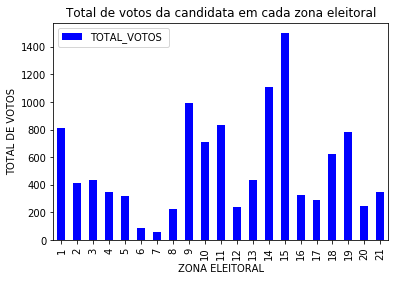

In [22]:
# Criando um gráfico para os votos obtidos pela candidata em cada zona eleitoral
df_leila.plot('NUMERO_ZONA', kind='bar', color='blue')
plt.title('Total de votos da candidata em cada zona eleitoral')

plt.xlabel('ZONA ELEITORAL')
plt.ylabel('TOTAL DE VOTOS')

plt.show()

In [84]:
# Vamos comparar seu rendimento com o candidato que obteve o maior número de votos para este cargo:
# Como visto anteriormente o candidato Julio Cesar teve o maior número de votos
df_julio = df[df['NOME_URNA_CANDIDATO'] == 'JULIO CESAR']

df_julio.head(21)

,NUMERO_ZONA,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,DESC_SIT_CAND_TOT,TOTAL_VOTOS
666,1,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,533
1753,2,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,2199
2877,3,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,801
4010,4,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,2269
5132,5,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,1665
6254,6,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,1805
7376,7,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,295
8498,8,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,1531
9620,9,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,1586
10743,10,JULIO CESAR,DEPUTADO DISTRITAL,ELEITO POR QP,1658


Text(0,0.5,'TOTAL DE VOTOS')

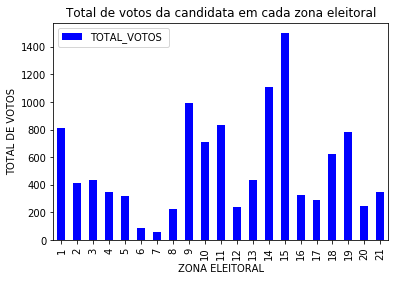

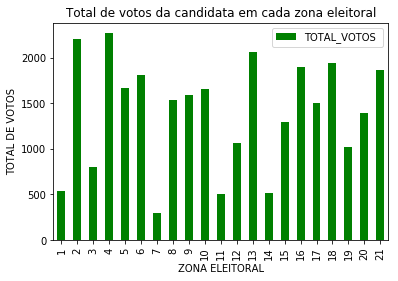

In [97]:
# Criando um gráfico para os votos obtidos pela candidata em cada zona eleitoral
df_leila.plot('NUMERO_ZONA', kind='bar', color='blue')
plt.title('Total de votos da candidata em cada zona eleitoral')

plt.xlabel('ZONA ELEITORAL')
plt.ylabel('TOTAL DE VOTOS')

df_julio.plot('NUMERO_ZONA', kind='bar', color='green')

plt.title('Total de votos da candidata em cada zona eleitoral')

plt.xlabel('ZONA ELEITORAL')
plt.ylabel('TOTAL DE VOTOS')


<a name='CONCLUSAO'></a>
<a href='#TOPO'>Voltar ao índice</a>
<h1>Conclusão</h1>


Espero ter atingido a proposta deste estudo através dos meus métodos e explicações realizados aqui. 

Caso tenha interesse, você pode me seguir nas redes sociais e enviar críticas e sugestões. 

<img src = "https://cdn-images-1.medium.com/max/1125/1*dDNpLKu_oTLzStsDTnkJ-g.png" width=75 align=left><a href='https://github.com/13yurimiguel'>13yurimiguel</a><p>

<img src = "https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" width=70 align=left><a href='https://www.kaggle.com/yurimiguel'>yurimiguel</a><p>
    
<img src = "http://s.glbimg.com/po/tt/f/original/2011/05/18/linkedin_logo_1.jpg" width=70 align=left><a href='https://www.linkedin.com/in/yuri-miguel-23295b87/'>Yuri Miguel</a><p>

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Instagram_logo.svg/1200px-Instagram_logo.svg.png" width=75 align=left><a href='https://www.instagram.com/y.m.eng/'>@y.m.eng</a><p>
